In [1]:
import pandas as pd
data = pd.read_csv('AAPL.csv')
print(data.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2013-01-02  19.779285  19.821428  19.343929  19.608213  16.837111   
1  2013-01-03  19.567142  19.631071  19.321428  19.360714  16.624594   
2  2013-01-04  19.177500  19.236786  18.779642  18.821428  16.161524   
3  2013-01-07  18.642857  18.903570  18.400000  18.710714  16.066458   
4  2013-01-08  18.900356  18.996071  18.616072  18.761070  16.109695   

      Volume  
0  560518000  
1  352965200  
2  594333600  
3  484156400  
4  458707200  


In [2]:
import numpy as np

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
prices = data['Close'].values
days = list(range(len(prices)))

In [4]:
X = np.array(days).reshape(-1, 1)
y = np.array(prices)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

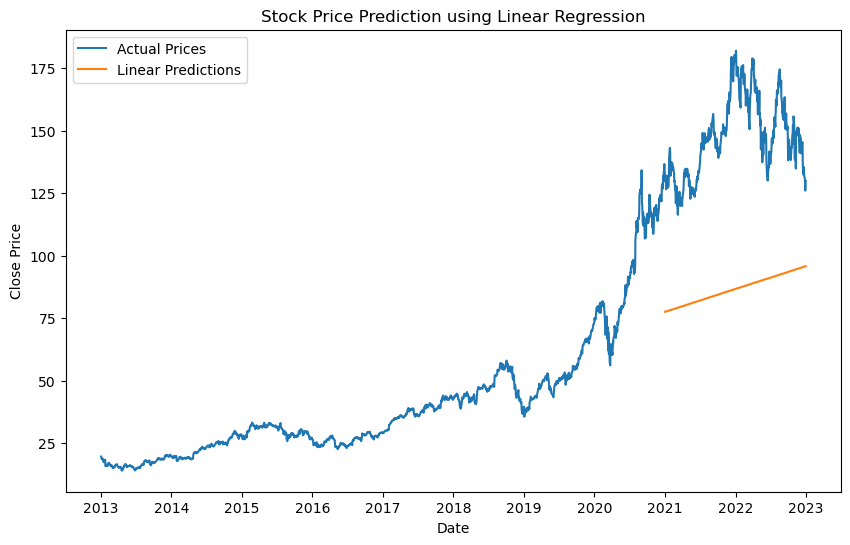

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Prices')
plt.plot(data['Date'][len(X_train):], linear_predictions, label='Linear Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Linear Regression')
plt.legend()
plt.show()


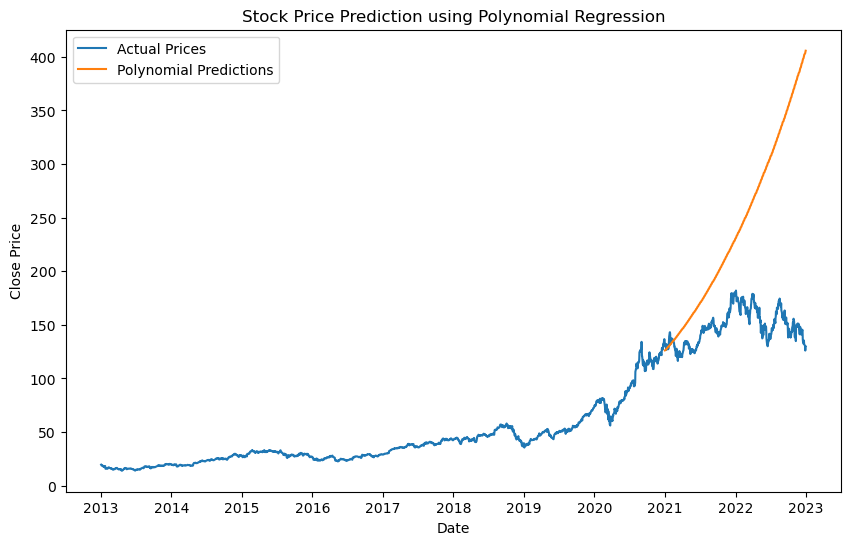

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 4 
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Prices')
plt.plot(data['Date'][len(X_train):], poly_predictions, label='Polynomial Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction using Polynomial Regression')
plt.legend()
plt.show()


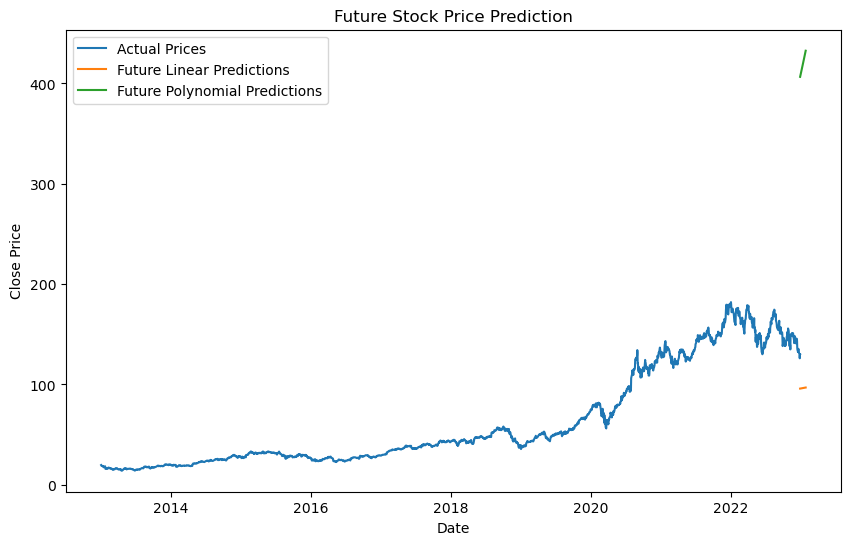

In [8]:
import numpy as np
future_days = 30
last_day = X[-1][0]
future_X = np.array([last_day + i for i in range(1, future_days + 1)]).reshape(-1, 1)

future_linear_predictions = linear_model.predict(future_X)

future_poly_predictions = poly_model.predict(future_X)

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual Prices')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=future_days, freq='D'), future_linear_predictions, label='Future Linear Predictions')
plt.plot(pd.date_range(start=data['Date'].iloc[-1], periods=future_days, freq='D'), future_poly_predictions, label='Future Polynomial Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Future Stock Price Prediction')
plt.legend()
plt.show()